In [3]:
!nvidia-smi

Mon Apr 29 09:00:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!mkdir {HOME}/dataset
%cd {HOME}/dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="enter your own api key")
project = rf.workspace("mohamed-traore-2ekkp").project("gtsdb---german-traffic-sign-detection-benchmark")
version = project.version(3)
dataset = version.download("yolov8")


/content/dataset
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninst

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to GTSDB---German-Traffic-Sign-Detection-Benchmark-3 in yolov8:: 100%|██████████| 2634/2634 [00:00<00:00, 8658.83it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 193MB/s]
New https://pypi.org/project/ultralytics/8.2.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1714381371.7f7a5adb44ef.1750.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch6480.jpg  weights
P_curve.png					    train_batch6481.jpg
PR_curve.png					    train_batch6482.jpg


/content


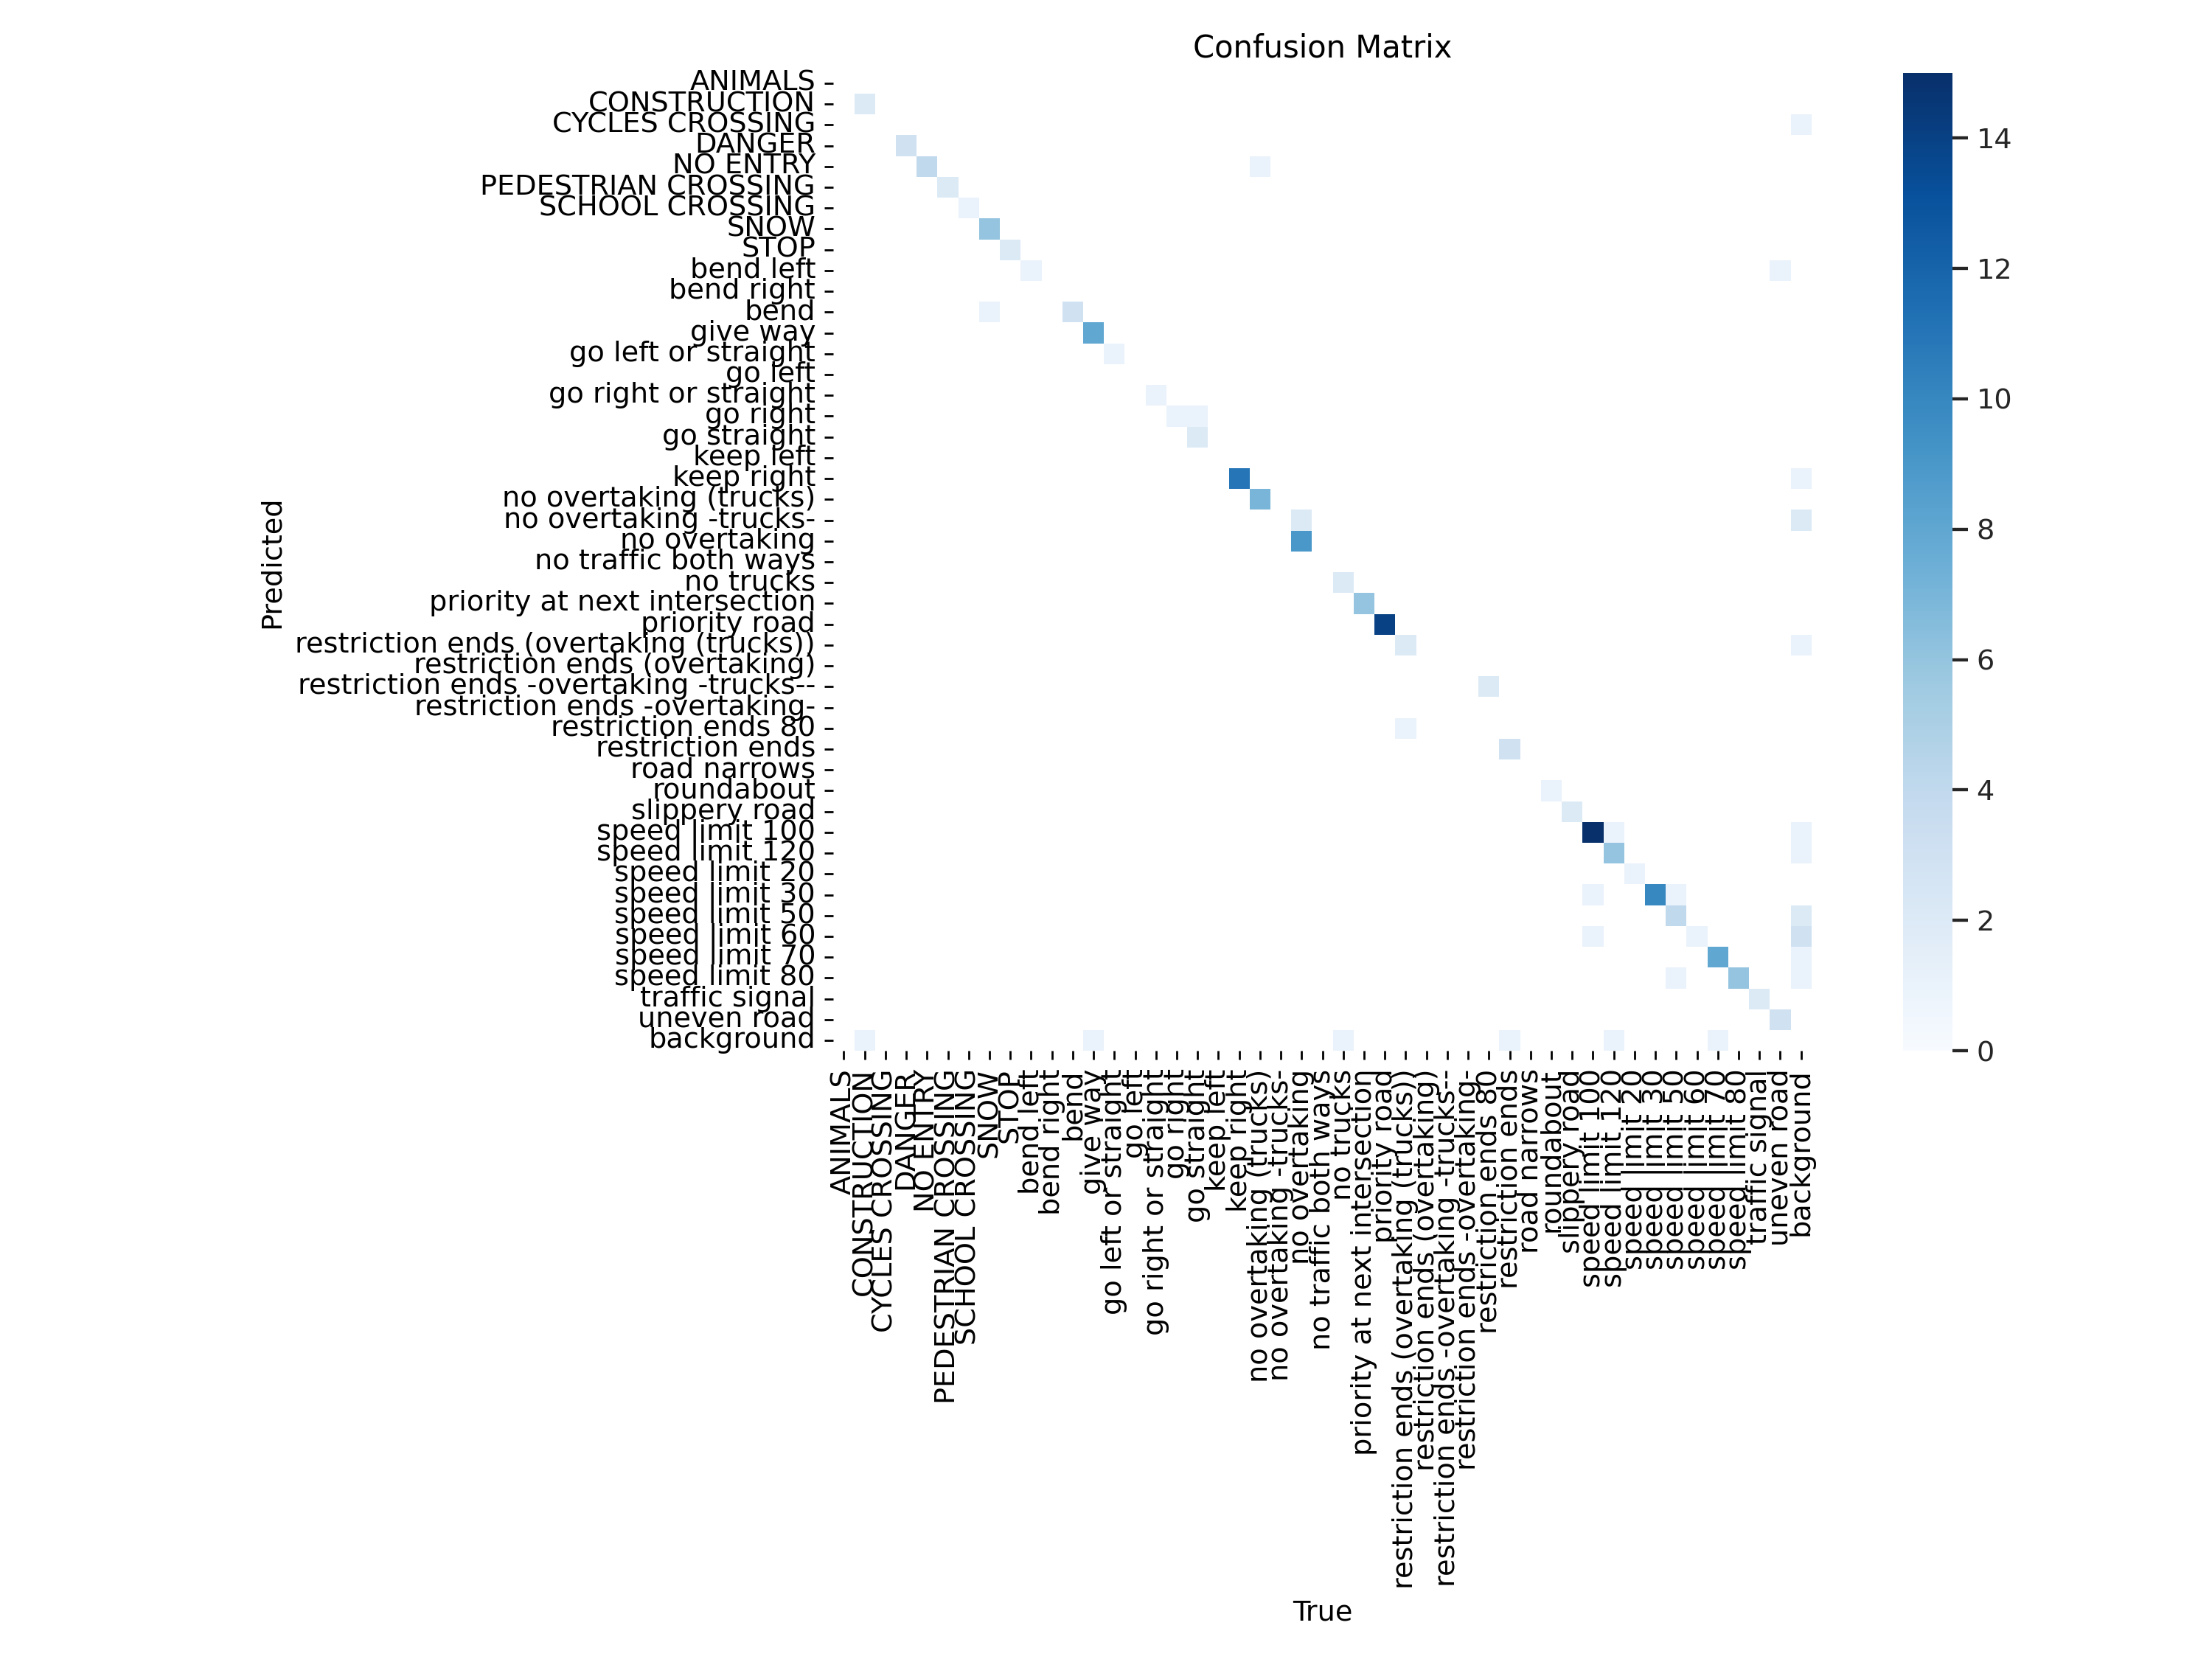

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1600)

/content


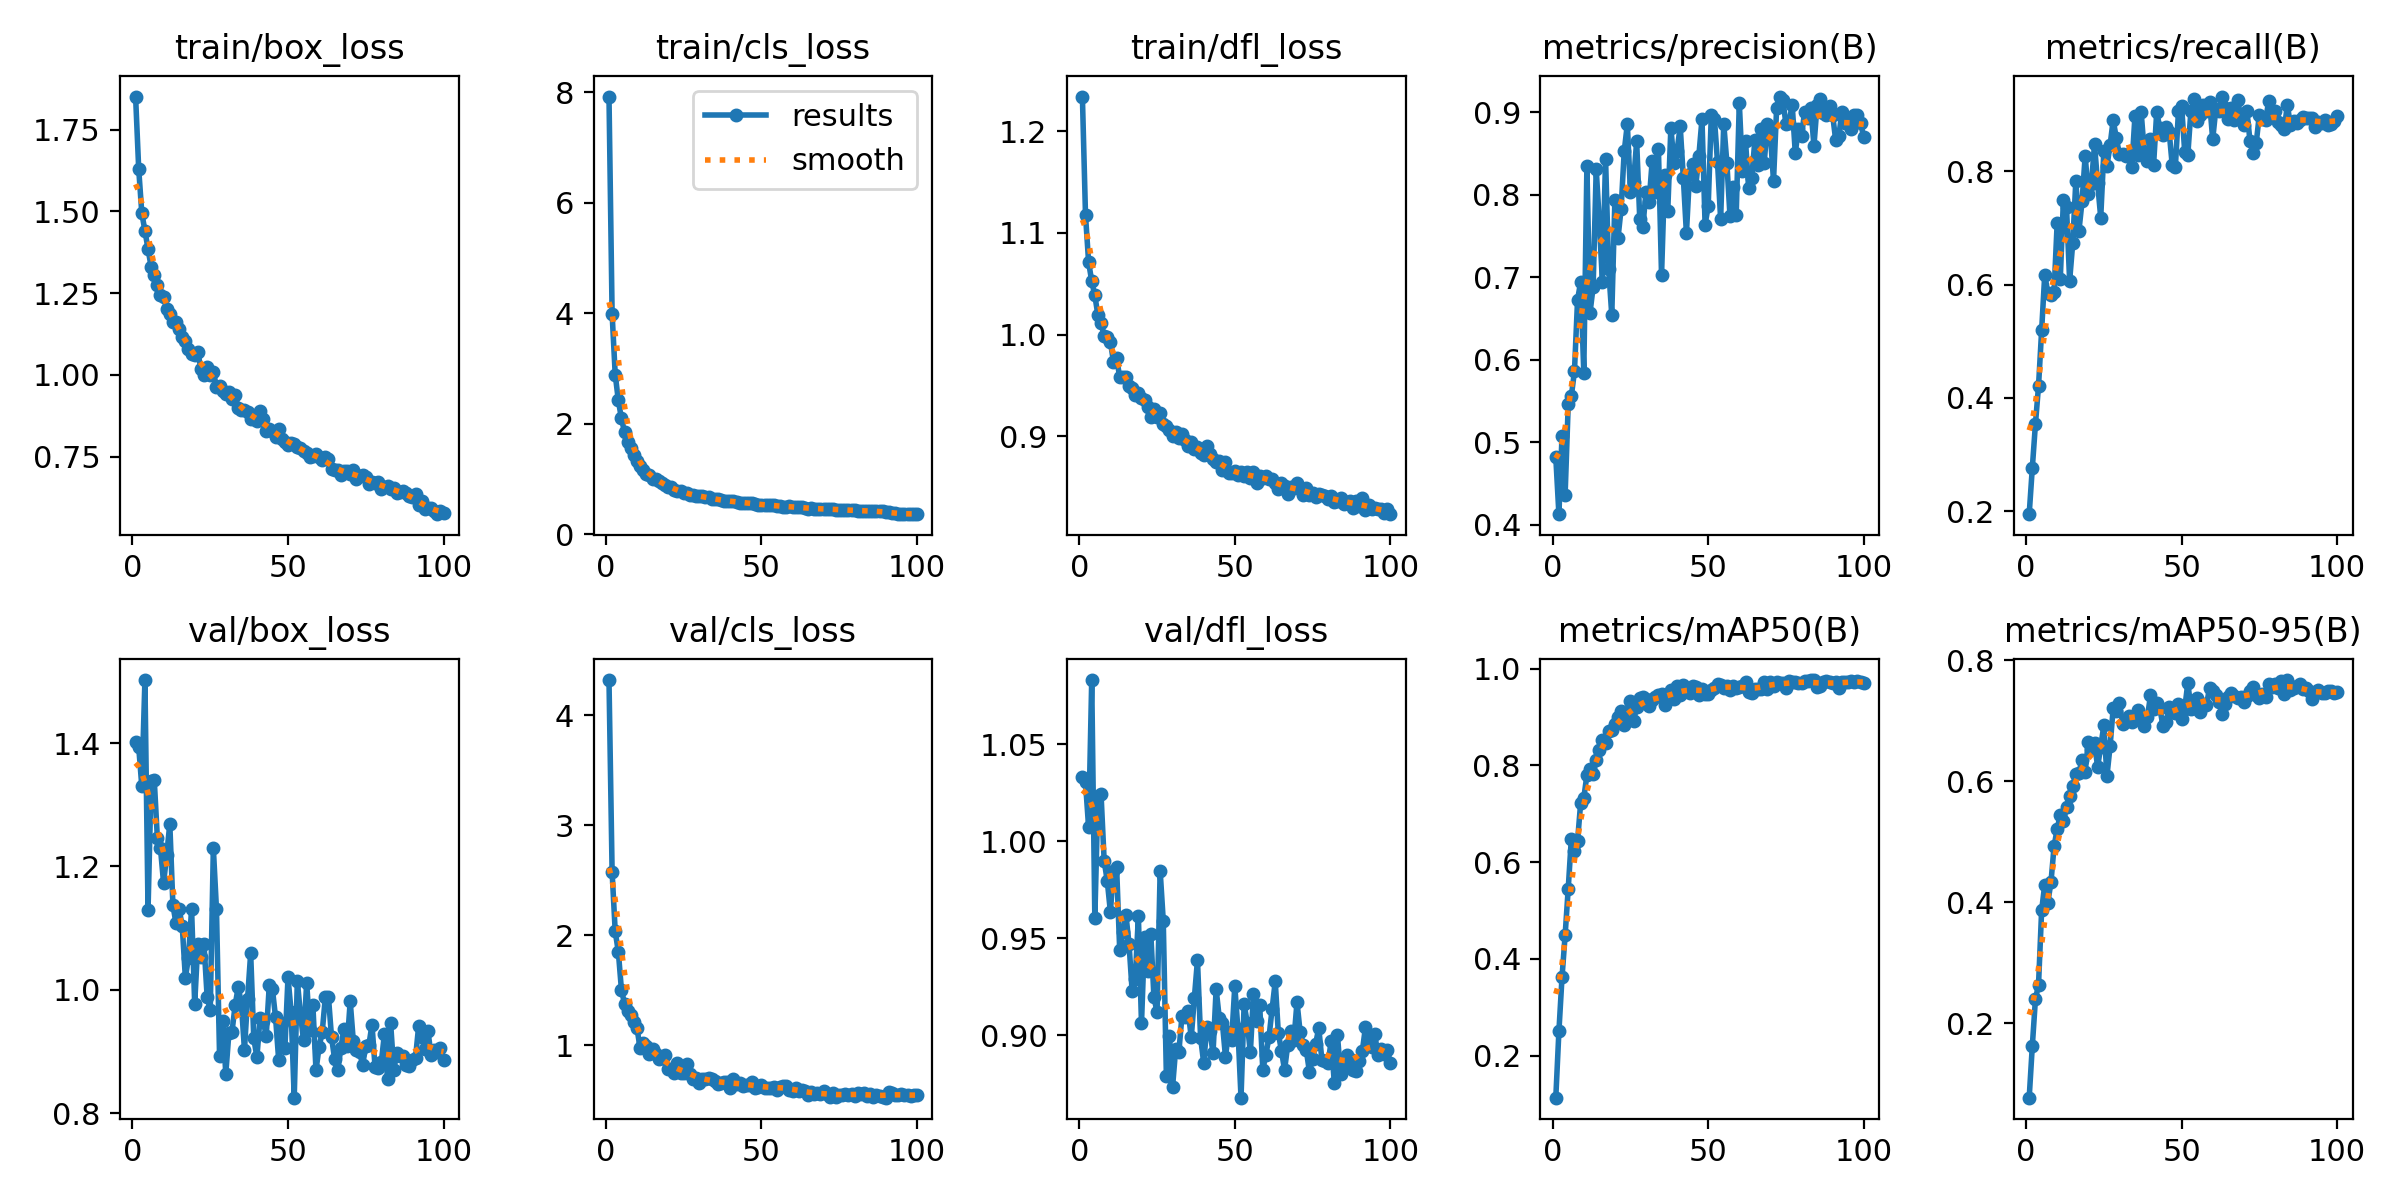

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1600)

/content


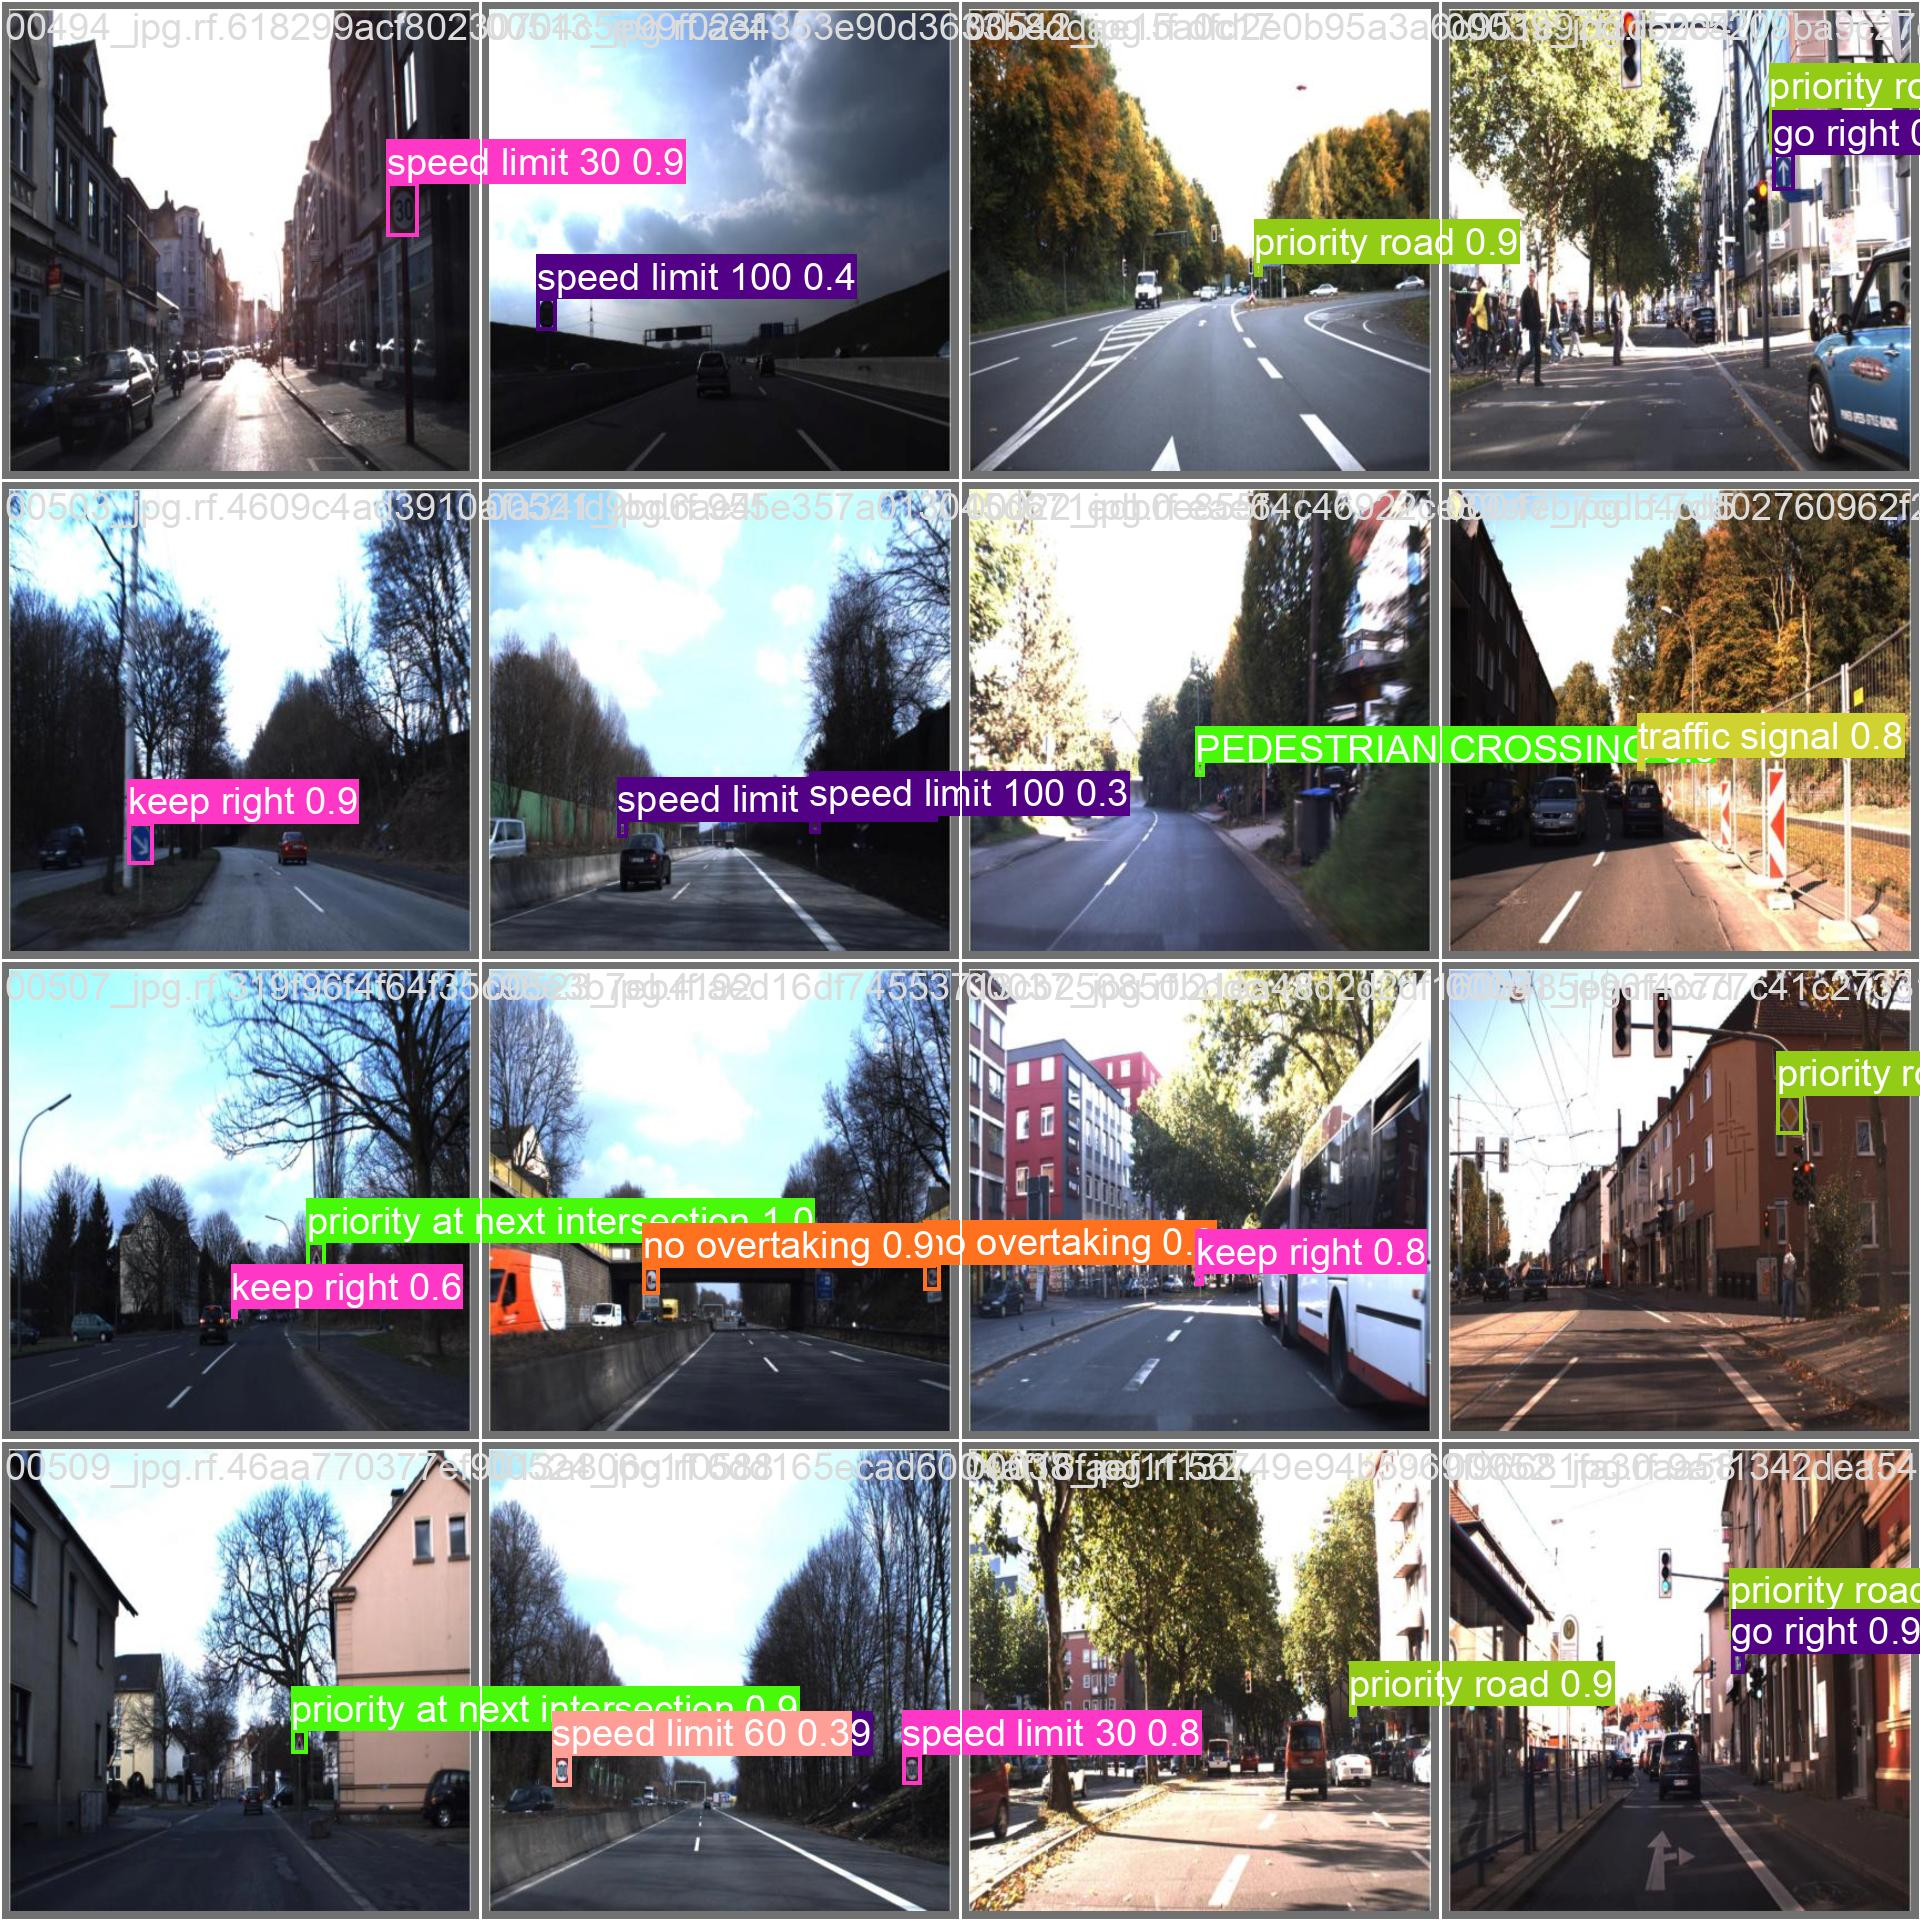

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/dataset/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/valid/labels.cache... 108 images, 6 backgrounds, 0 corrupt: 100% 108/108 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.40it/s]
                   all        108        170      0.859      0.918      0.977       0.76
          CONSTRUCTION        108          3          1      0.832      0.995      0.723
                DANGER        108          3      0.871          1      0.995      0.789
              NO ENTRY      

## Inference Custom Model

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs

image 1/54 /content/dataset/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00026_jpg.rf.4c55e8a72c668d5a0c4a948580757cd9.jpg: 800x800 1 speed limit 30, 22.7ms
image 2/54 /content/dataset/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00028_jpg.rf.975675b221390ef694e07dfa6eca3bea.jpg: 800x800 1 CONSTRUCTION, 1 go straight, 22.7ms
image 3/54 /content/dataset/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00032_jpg.rf.36c53d3b779076659978df5719da5b39.jpg: 800x800 1 give way, 1 go right or straight, 22.6ms
image 4/54 /content/dataset/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00041_jpg.rf.b6ba02dfdcd60a59334e5f24efaea448.jpg: 800x800 1 keep right, 22.6ms
image 5/54 /content/dataset/GTSDB---German-Traffic-Sign-Detection-Benchmark-3/test/images/00062_jp

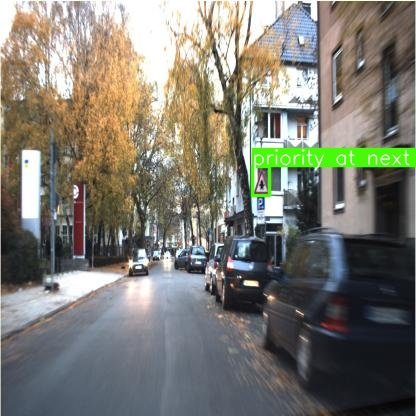

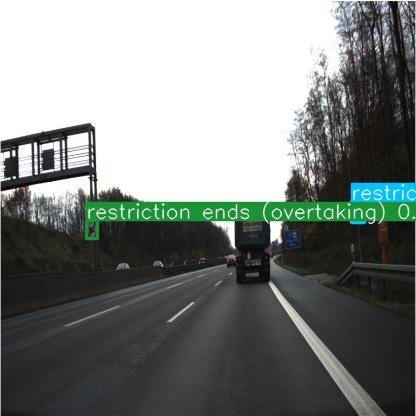

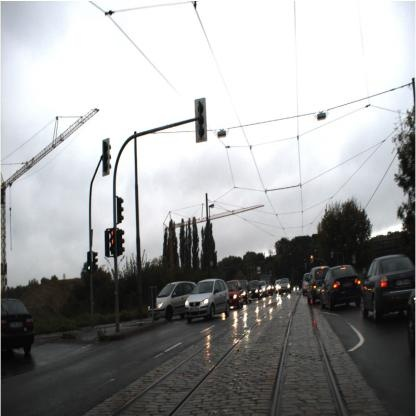

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")